In [1]:
"""
z bin 1 recreate Woo et al fig 2 upper panel

Author: Alan Nguyen

12-06-2020
"""

'\nz bin 1 recreate Woo et al fig 2 upper panel\n\nAuthor: Alan Nguyen\n\n12-06-2020\n'

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table, Column
from scipy.optimize import curve_fit, leastsq
from astropy.cosmology import WMAP9 as cosmo
from astropy import units as u
import os
import math as m
from astropy import constants as const
import time
from BOSS_func_v9 import *
from general_functions_v1 import *

In [3]:
hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin1_v2.fits')

zbin1_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin2.fits')

zbin2_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin3.fits')

zbin3_data = hdul[1].data

hdul.close()

#########################################

hdul = fits.open('AGN_zbin_fitsfiles\AGN_zbin4.fits')

zbin4_data = hdul[1].data

hdul.close()

In [4]:
zbin1_OIII_flux = zbin1_data['FLUX'][:, 17]
zbin1_redshift  = zbin1_data['Z']

zbin2_OIII_flux = zbin2_data['FLUX'][:, 17]
zbin2_redshift  = zbin2_data['Z']

zbin3_OIII_flux = zbin3_data['FLUX'][:, 17]
zbin3_redshift  = zbin3_data['Z']

zbin4_OIII_flux = zbin4_data['FLUX'][:, 17]
zbin4_redshift  = zbin4_data['Z']

In [5]:
zbin1_lum_dis = cosmo.luminosity_distance(zbin1_redshift)
zbin1_lum_dis = zbin1_lum_dis.to(u.cm)
zbin1_OIII_flux_correct_units = zbin1_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin1_OIII_lum = 4 * np.pi * zbin1_OIII_flux_correct_units * (zbin1_lum_dis ** 2)

##################################################################################

zbin2_lum_dis = cosmo.luminosity_distance(zbin2_redshift)
zbin2_lum_dis = zbin2_lum_dis.to(u.cm)
zbin2_OIII_flux_correct_units = zbin2_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin2_OIII_lum = 4 * np.pi * zbin2_OIII_flux_correct_units * (zbin2_lum_dis ** 2)

##################################################################################

zbin3_lum_dis = cosmo.luminosity_distance(zbin3_redshift)
zbin3_lum_dis = zbin3_lum_dis.to(u.cm)
zbin3_OIII_flux_correct_units = zbin3_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin3_OIII_lum = 4 * np.pi * zbin3_OIII_flux_correct_units * (zbin3_lum_dis ** 2)

##################################################################################

zbin4_lum_dis = cosmo.luminosity_distance(zbin4_redshift)
zbin4_lum_dis = zbin4_lum_dis.to(u.cm)
zbin4_OIII_flux_correct_units = zbin4_OIII_flux * (10**(-17)) * (u.erg/(u.cm*u.cm*u.second))
zbin4_OIII_lum = 4 * np.pi * zbin4_OIII_flux_correct_units * (zbin4_lum_dis ** 2)

In [6]:
zbin1_OIII_lum_array = np.array(zbin1_OIII_lum)
zbin2_OIII_lum_array = np.array(zbin2_OIII_lum)
zbin3_OIII_lum_array = np.array(zbin3_OIII_lum)
zbin4_OIII_lum_array = np.array(zbin4_OIII_lum)

##################################################################################

zbin1_OIII_lum_array = np.log10(zbin1_OIII_lum_array)
zbin2_OIII_lum_array = np.log10(zbin2_OIII_lum_array)
zbin3_OIII_lum_array = np.log10(zbin3_OIII_lum_array)
zbin4_OIII_lum_array = np.log10(zbin4_OIII_lum_array)

##################################################################################

zbin1_mean_OIII_lum = np.mean(zbin1_OIII_lum_array)
zbin1_std_OIII_lum   = np.std(zbin1_OIII_lum_array)
zbin1_mean_redshift = np.mean(zbin1_redshift)

##################################################################################

zbin2_mean_OIII_lum = np.mean(zbin2_OIII_lum_array)
zbin2_std_OIII_lum   = np.std(zbin2_OIII_lum_array)
zbin2_mean_redshift = np.mean(zbin2_redshift)

##################################################################################

zbin3_mean_OIII_lum = np.mean(zbin3_OIII_lum_array)
zbin3_std_OIII_lum   = np.std(zbin3_OIII_lum_array)
zbin3_mean_redshift = np.mean(zbin3_redshift)

##################################################################################

zbin4_mean_OIII_lum = np.mean(zbin4_OIII_lum_array)
zbin4_std_OIII_lum   = np.std(zbin4_OIII_lum_array)
zbin4_mean_redshift = np.mean(zbin4_redshift)

In [7]:
plot_yaxis = np.zeros(4)
plot_yaxis[0] = zbin1_mean_OIII_lum
plot_yaxis[1] = zbin2_mean_OIII_lum
plot_yaxis[2] = zbin3_mean_OIII_lum
plot_yaxis[3] = zbin4_mean_OIII_lum

plot_xaxis = np.zeros(4)
plot_xaxis[0] = zbin1_mean_redshift
plot_xaxis[1] = zbin2_mean_redshift
plot_xaxis[2] = zbin3_mean_redshift
plot_xaxis[3] = zbin4_mean_redshift

plot_yerror = np.zeros(4)
plot_yerror[0] = zbin1_std_OIII_lum
plot_yerror[1] = zbin2_std_OIII_lum
plot_yerror[2] = zbin3_std_OIII_lum
plot_yerror[3] = zbin4_std_OIII_lum

In [8]:
plot_xaxis

array([0.09548108, 0.22160242, 0.39126638, 0.48597243])

In [59]:
woo_xaxis  = np.array([0.035, 0.075, 0.15, 0.25])
woo_yaxis  = np.array([39.7, 40.4, 41, 41.4])
woo_yerror = np.array([0.6, 0.6, 0.5, 0.5])

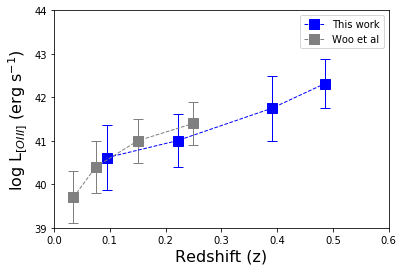

In [63]:
plt.errorbar(plot_xaxis, plot_yaxis, plot_yerror, color = 'blue', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5, label = 'This work')
plt.errorbar(woo_xaxis, woo_yaxis, woo_yerror, color = 'grey', linewidth = 1, linestyle = '--', marker = 's', ms = 10, capsize = 5, label = 'Woo et al')

plt.xlim(0,0.6)
plt.ylim(39, 44)

plt.xlabel('Redshift (z)', fontsize = 16)
plt.ylabel(r'log L$_{[OIII]}$ (erg s$^{-1}$)', fontsize = 16)

plt.legend()

# plt.savefig('WooEtAl_Fig2Upper_Clone_v2.png')

plt.show()